In [6]:
import numpy as np

In [7]:
data_ibl = np.load("20240204_1426.npy")
time_ibl = data_ibl[:, 0]
omegaX_ibl = data_ibl[:, 1]
omegaY_ibl = data_ibl[:, 2] * (-1)
omegaZ_ibl = data_ibl[:, 3]

In [8]:
data_1 = np.load("05022024_1.npy")
time_1 = data_1[:, 0]
fi_1 = data_1[:, 1]
theta_1 = data_1[:, 2]
omega_1 = theta_1*3600

In [9]:
data_2 = np.load("05022024_2.npy")
time_2 = data_2[:, 0]
fi_2 = data_2[:, 1]
theta_2 = data_2[:, 2]
omega_2 = theta_2*3600

In [10]:
import matplotlib.pyplot as plt

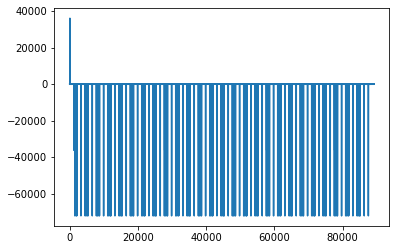

In [11]:
plt.plot(time_1, omega_1)

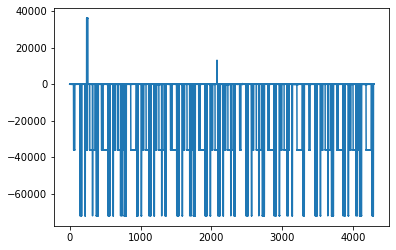

In [12]:
plt.plot(time_ibl, omegaY_ibl)

In [13]:
def cut_peaks(data, n):
    counter = 0
    in_peak = False

    for i in range(len(data)):
        if abs(data[i]) > 1000 and not in_peak:
            in_peak = True
            counter += 1
        elif in_peak and abs(data[i]) < 200:
            in_peak = False
            if counter == n:
                break
    print(data[i-20])
    if counter < n:
        print("Only ", counter, " peaks in data")
        return data
    else:
        return data[:i+1]

In [14]:
dataibl = cut_peaks(omegaY_ibl, 10)
timeibl = time_ibl[:len(dataibl)]

-3781.94157206


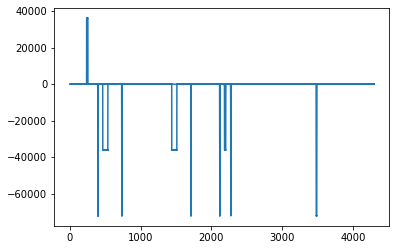

In [15]:
plt.figure()
plt.plot(timeibl, dataibl)
plt.show()

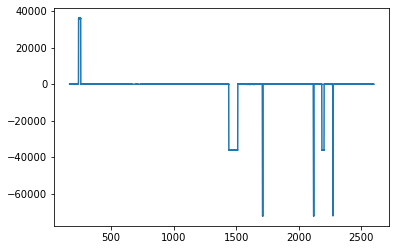

In [16]:
plt.figure()
plt.plot(timeibl[:len(dataibl)//2], dataibl[:len(dataibl)//2])
plt.show()

и как это понимать??? почему оно различается?

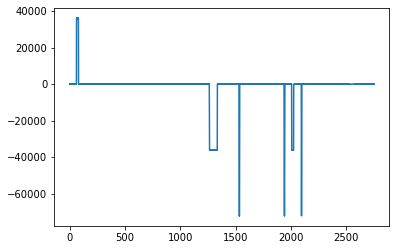

In [17]:
plt.figure()
plt.plot(time_1[:25000], omega_1[:25000])
plt.show()

In [31]:
def find_points(omega1, omega2, n_peaks, limit):
    counter = 0
    in_peak = False
    same_time = []
    index2 = 0 

    for i in range(len(omega1)):
        if abs(omega1[i]) > limit and not in_peak:
            in_peak = True
            counter += 1
            for j in range(index2, len(omega2), 1):
                if abs(omega2[j]) > limit:
                    same_time.append((i,j))
                    index2 = j
                    break
            
        elif in_peak and abs(omega1[i]) < limit:
            in_peak = False
            for j in range(index2, len(omega2), 1):
                if abs(omega2[j]) < limit:
                    same_time.append((i,j))
                    index2 = j
                    break
            if counter == n_peaks:
                break
    if counter < n_peaks:
        print("Only ", counter, " peaks in data")
    else:
        return same_time

In [34]:
points = find_points(omegaY_ibl, omega_1, 10, 500)
print(points, len(points))

[(14066, 556), (17861, 728), (254314, 11466), (268908, 12129), (308015, 13906), (309310, 13966), (389468, 17604), (390763, 17663), (403119, 18225), (406913, 18396), (420620, 19019), (421465, 19057), (661868, 29984), (664063, 30084), (904517, 41008), (906261, 41087), (918569, 41647), (933163, 42309), (972068, 44078), (973363, 44137)] 20


In [35]:
for i in range(len(points)):
    print(omegaY_ibl[points[i][0]], omega_1[points[i][1]])

539.7804193 3028.464
348.91362315 -35.352000000000004
-645.1723771 -3765.9960000000005
-465.84323294 -31.680000000000003
-540.78843943 -1127.52
-402.10454609 -9.216000000000001
-584.40927132 -1866.24
-379.93597371 53.136
-624.61389733 -3859.5600000000004
-482.84352796 0.36000000000000004
-611.604827 -1009.548
-342.74291861 -5.364
-584.99185547 -1330.3799999999999
-325.12289266 -20.628
-697.53986773 -3935.988
-413.32261362 -21.384
-649.96515123 -3078.936
-483.07110933 5.94
-574.02993953 -1518.084
-362.15537263 23.616
